### Importing Packages / Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [68]:
dataset = pd.read_csv("C:\\Users\\dhuri\\Downloads\\boston_housing.csv")

In [69]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2,NaN


### Dropping the 'Unnamed: 14' column

In [70]:
dataset = dataset.drop('Unnamed: 14',axis=1)

In [71]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


### Exploring the Dataset using .info() command

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       503 non-null    float64
 2   INDUS    504 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      504 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      500 non-null    float64
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Checking the number of rows and columns in the dataset using .shape command

In [73]:
dataset.shape

(506, 14)

### Checking the column names using .columns command

In [74]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## PART A

### Question- 1.

Except PTRATIO predictor, perform the necessary “Handling Missing Data” operations to the missing values and highlight them with yellow.

### Dataset excluding PTRATIO predictor

In [75]:
df = dataset[dataset.columns[dataset.columns != 'PTRATIO']]

In [76]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,396.90,5.33,36.2


### Checking the number of NULL / Missing values in each column

In [77]:
df.isnull().sum()

CRIM     1
ZN       3
INDUS    2
CHAS     0
NOX      2
RM       0
AGE      0
DIS      1
RAD      6
TAX      0
B        0
LSTAT    0
MEDV     0
dtype: int64

### Filtering the Dataframe 'df' to find the missing values

In [78]:
missing_values = df.isnull().any(axis=1)

In [79]:
# missing_values: Series of boolean values. Gives True if there is a NULL value otherwise False.
missing_values

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

### Creating a new Dataframe contaning rows with missing values

In [80]:
missing_rows = df[missing_values]

In [81]:
missing_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV
8,0.21124,NaN,7.87,0,0.524,5.631,100.0,6.0821,5.0,311,386.63,29.93,16.5
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,NaN,307,395.62,8.47,19.9
24,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,NaN,307,394.33,16.30,15.6
28,0.77299,0.0,8.14,0,0.538,6.495,94.4,NaN,4.0,307,387.94,12.80,18.4
30,1.13081,0.0,NaN,0,0.538,5.713,94.1,4.2330,4.0,307,360.17,22.60,12.7
32,NaN,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,232.60,27.71,13.2
42,0.14150,0.0,NaN,0,0.448,6.169,6.6,5.7209,3.0,233,383.37,5.81,25.3
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,NaN,313,396.90,5.77,24.7
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,NaN,305,390.91,5.52,22.8
76,0.10153,0.0,12.83,0,NaN,6.279,74.5,4.0522,5.0,398,373.66,11.97,20.0


In [82]:
print("Total number of rows including missing values: ", len(df))
print("Total number of missing value rows: ", len(missing_rows))

Total number of rows including missing values:  506
Total number of missing value rows:  15


### Highlighting missing values using Pandas styling

In [83]:
missing_rows.style.applymap(lambda x: 'background-color: yellow' if pd.isnull(x) else '',
                            subset=['CRIM','ZN','INDUS','NOX','DIS','RAD'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV
8,0.211240,nan,7.870000,0,0.524000,5.631000,100.000000,6.082100,5.000000,311,386.630000,29.930000,16.500000
15,0.627390,0.000000,8.140000,0,0.538000,5.834000,56.500000,4.498600,nan,307,395.620000,8.470000,19.900000
24,0.750260,0.000000,8.140000,0,0.538000,5.924000,94.100000,4.399600,nan,307,394.330000,16.300000,15.600000
28,0.772990,0.000000,8.140000,0,0.538000,6.495000,94.400000,nan,4.000000,307,387.940000,12.800000,18.400000
30,1.130810,0.000000,nan,0,0.538000,5.713000,94.100000,4.233000,4.000000,307,360.170000,22.600000,12.700000
32,nan,0.000000,8.140000,0,0.538000,5.950000,82.000000,3.990000,4.000000,307,232.600000,27.710000,13.200000
42,0.141500,0.000000,nan,0,0.448000,6.169000,6.600000,5.720900,3.000000,233,383.370000,5.810000,25.300000
56,0.020550,85.000000,0.740000,0,0.410000,6.383000,35.700000,9.187600,nan,313,396.900000,5.770000,24.700000
72,0.091640,0.000000,10.810000,0,0.413000,6.065000,7.800000,5.287300,nan,305,390.910000,5.520000,22.800000
76,0.101530,0.000000,12.830000,0,nan,6.279000,74.500000,4.052200,5.000000,398,373.660000,11.970000,20.000000


Lambda is used to check for the missing values and simultaneously applying the styling function if it is meeting the missing value codition.

## Part - A
### Question - 2

Find possible "outliers" in the PTRATIO predictor. The possible causes of outliers are:

(a)	Typing non-numeric value.

(b)	Shift in decimal place while data entry error.

(c)	Genuine case of outlier.

Highlight the cells with outlier cases and state the possible cause indicating a, b, or c.

In [84]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


### CASE (a) Checking for non-numeric value

In [85]:
dataset['PTRATIO'] = pd.to_numeric(dataset['PTRATIO'], errors='coerce')

Here, we are converting PTRATIO values to numeric data type.

errors = 'coerce' meaning if any value which can't be converted to numeric values, it will be replaced with NaN.

If there is any NaN value, it means we have non-numeric value which could be a cause of a possible outlier.

If not, that means we don't have any case for non-numeric value in the PTRATIO predictor.

### To check for NaN values in PTRATIO 

In [86]:
dataset['PTRATIO'].isnull().sum()

0

No values of NaN, so no case of non-numeric value.

### Checking for case(b) data entry error i.e. shift in decimal place

In [87]:
Case_B = dataset[dataset['PTRATIO'] % 1 !=0]

In [88]:
Case_B

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6.0,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6.0,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6.0,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6.0,391,19.2,395.77,15.10,17.5


### Highlighting the Outliers for Case (b)

In [89]:
Case_B.style.applymap(lambda x: 'background-color: red' if x%1 != 0 else '',
                               subset=['PTRATIO'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1.000000,296,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2.000000,242,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2.000000,242,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3.000000,222,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3.000000,222,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0,0.458000,6.430000,58.700000,6.062200,3.000000,222,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0,0.524000,6.012000,66.600000,5.560500,5.000000,311,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0,0.524000,6.172000,96.100000,5.950500,5.000000,311,15.200000,396.900000,19.150000,27.100000
8,0.211240,nan,7.870000,0,0.524000,5.631000,100.000000,6.082100,5.000000,311,15.200000,386.630000,29.930000,16.500000
10,0.224890,12.500000,7.870000,0,0.524000,6.377000,94.300000,6.346700,5.000000,311,15.200000,392.520000,20.450000,15.000000


### Checking for case (c) Gennuine case of Outlier

### Creating boxplot to visually look for any outliers using Seaborn library

<AxesSubplot:xlabel='PTRATIO'>

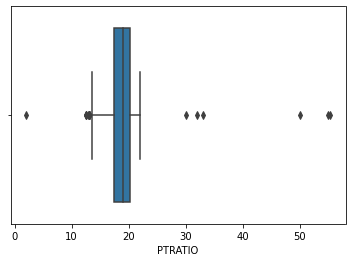

In [90]:
sns.boxplot(x='PTRATIO',data=dataset)

Black dots represents the outliers as these are the data points that fall beyond the whiskers.

### Detecting the Outliers using IQR- Inter Quartile Range method

In [91]:
Q1 = dataset['PTRATIO'].quantile(0.25)
Q3 = dataset['PTRATIO'].quantile(0.75)
print("Value of Quartile 1: ", Q1)
print("Value of Quartile 3: ", Q3)

Value of Quartile 1:  17.4
Value of Quartile 3:  20.2


In [92]:
IQR = Q3 - Q1
print("Value of Inter Quartile Range: ", IQR)

Value of Inter Quartile Range:  2.8000000000000007


In [93]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Lower Bound Value: ", round(lower_bound))
print("Upper Bound Value: ", round(upper_bound))

Lower Bound Value:  13
Upper Bound Value:  24


 Outlier: Any value< lower_bound or Any value>upper_bound

In [94]:
outliers_Case_C = dataset[(dataset['PTRATIO']<lower_bound) | 
    (dataset['PTRATIO']>upper_bound)]

In [95]:
outliers_Case_C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
21,0.85204,0.0,8.14,0,0.538,5.965,89.2,4.0123,4.0,307,2.0,392.53,13.83,19.6
30,1.13081,0.0,NaN,0,0.538,5.713,94.1,4.2330,4.0,307,30.0,360.17,22.60,12.7
84,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3.0,247,32.0,396.90,9.62,23.9
87,0.07151,0.0,4.49,0,0.449,6.121,56.8,3.7476,3.0,247,33.0,395.15,8.44,22.2
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2.0,188,50.0,389.15,14.37,22.0
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4.0,437,55.0,396.90,34.41,14.4
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5.0,398,55.4,396.90,5.39,34.9
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,2.0,329,12.6,396.90,4.08,33.3
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2.0,329,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2.0,329,12.6,392.20,6.62,34.6


### Highlighting the Outliers for Case (c)

In [96]:
outliers_Case_C.style.applymap(lambda x: 'background-color: yellow' if x<lower_bound or x>upper_bound else '',
                               subset=['PTRATIO'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
21,0.852040,0.000000,8.140000,0,0.538000,5.965000,89.200000,4.012300,4.000000,307,2.000000,392.530000,13.830000,19.600000
30,1.130810,0.000000,nan,0,0.538000,5.713000,94.100000,4.233000,4.000000,307,30.000000,360.170000,22.600000,12.700000
84,0.050590,0.000000,4.490000,0,0.449000,6.389000,48.000000,4.779400,3.000000,247,32.000000,396.900000,9.620000,23.900000
87,0.071510,0.000000,4.490000,0,0.449000,6.121000,56.800000,3.747600,3.000000,247,33.000000,395.150000,8.440000,22.200000
120,0.068990,0.000000,25.650000,0,0.581000,5.870000,69.700000,2.257700,2.000000,188,50.000000,389.150000,14.370000,22.000000
141,1.628640,0.000000,21.890000,0,0.624000,5.019000,100.000000,1.439400,4.000000,437,55.000000,396.900000,34.410000,14.400000
189,0.083700,45.000000,3.440000,0,0.437000,7.185000,38.900000,4.566700,5.000000,398,55.400000,396.900000,5.390000,34.900000
196,0.040110,80.000000,1.520000,0,0.404000,7.287000,34.100000,7.309000,2.000000,329,12.600000,396.900000,4.080000,33.300000
197,0.046660,80.000000,1.520000,0,0.404000,7.107000,36.600000,7.309000,2.000000,329,12.600000,354.310000,8.610000,30.300000
198,0.037680,80.000000,1.520000,0,0.404000,7.274000,38.300000,7.309000,2.000000,329,12.600000,392.200000,6.620000,34.600000


## Part - B

### 1.	Substitute the missing data by NaN (not a number).

In [121]:
missing_values = df.isnull().any(axis=1)
missing_rows = dataset[missing_values]
missing_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
8,0.21124,NaN,7.87,0,0.524,5.631,100.0,6.0821,5.0,311,15.2,386.63,29.93,16.5
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,NaN,307,21.0,395.62,8.47,19.9
24,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,NaN,307,21.0,394.33,16.30,15.6
28,0.77299,0.0,8.14,0,0.538,6.495,94.4,NaN,4.0,307,21.0,387.94,12.80,18.4
30,1.13081,0.0,NaN,0,0.538,5.713,94.1,4.2330,4.0,307,30.0,360.17,22.60,12.7
32,NaN,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2
42,0.14150,0.0,NaN,0,0.448,6.169,6.6,5.7209,3.0,233,17.9,383.37,5.81,25.3
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,NaN,313,17.3,396.90,5.77,24.7
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,NaN,305,19.2,390.91,5.52,22.8
76,0.10153,0.0,12.83,0,NaN,6.279,74.5,4.0522,5.0,398,18.7,373.66,11.97,20.0


After Loading the boston_house excel file with some empty cells, Python automatically converting those empty cells as NaN.

### Omitting the NULL values

In [98]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


### Checking the number of NULL / missing values in each column

In [99]:
dataset.isnull().sum()

CRIM       1
ZN         3
INDUS      2
CHAS       0
NOX        2
RM         0
AGE        0
DIS        1
RAD        6
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Omitting the NULL values using dropna() command and saving it as a dataframe to a reduced_df variable

In [100]:
reduced_df = dataset.dropna()

In [101]:
reduced_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


### Checking the number of rows and columns before and after dropping the NULL values

In [102]:
print("Number of rows before dropping missing values: ", len(dataset))
print("Number of rows after dropping missing values: ", len(reduced_df))

Number of rows before dropping missing values:  506
Number of rows after dropping missing values:  491


## Second-way of omitting NULL values 

### Saving the NULL values from the original dataset 

In [104]:
NULL_values = dataset.isnull().any(axis=1)

### Filtering the rows from the original dataset where we have missing values

In [105]:
NULL_values_rows = dataset[NULL_values]

### Printing the rows where we have missing values

In [106]:
NULL_values_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
8,0.21124,NaN,7.87,0,0.524,5.631,100.0,6.0821,5.0,311,15.2,386.63,29.93,16.5
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,NaN,307,21.0,395.62,8.47,19.9
24,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,NaN,307,21.0,394.33,16.30,15.6
28,0.77299,0.0,8.14,0,0.538,6.495,94.4,NaN,4.0,307,21.0,387.94,12.80,18.4
30,1.13081,0.0,NaN,0,0.538,5.713,94.1,4.2330,4.0,307,30.0,360.17,22.60,12.7
32,NaN,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2
42,0.14150,0.0,NaN,0,0.448,6.169,6.6,5.7209,3.0,233,17.9,383.37,5.81,25.3
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,NaN,313,17.3,396.90,5.77,24.7
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,NaN,305,19.2,390.91,5.52,22.8
76,0.10153,0.0,12.83,0,NaN,6.279,74.5,4.0522,5.0,398,18.7,373.66,11.97,20.0


### Checking the total number of missing rows, rows including missing values and rows excluding missing values.

In [107]:
print("Number of rows before dropping missing values: ", len(dataset))
print("Number of missing value rows: ", len(missing_rows))
print("Number of rows after dropping missing values: ", len(reduced_df))

Number of rows before dropping missing values:  506
Number of missing value rows:  15
Number of rows after dropping missing values:  491


### Finally, Omitting these missing value rows

In [109]:
dataset_cleaned = dataset[~NULL_values]

In [111]:
dataset_cleaned.shape

(491, 14)

## Imputation

### Checking for the data distribution of each column

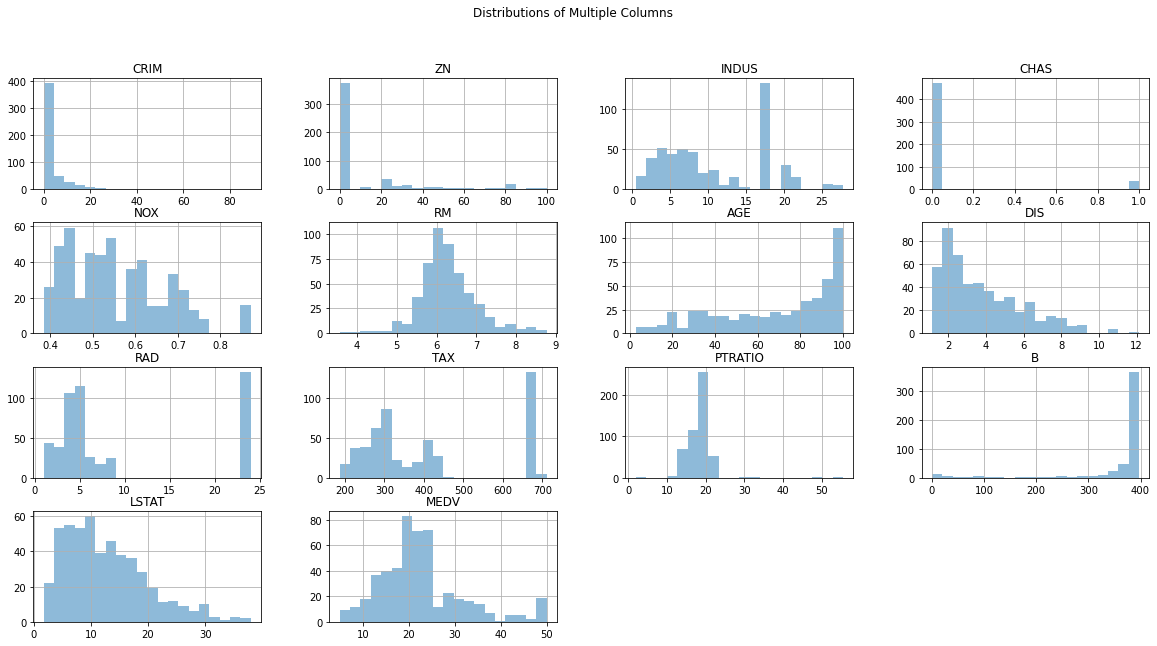

In [112]:
columns_to_plot = dataset.columns

dataset[dataset.columns].hist(bins=20, figsize=(20, 10), alpha=0.5)
plt.suptitle('Distributions of Multiple Columns')
plt.show()

Here, we can see all the predictors are not normally distributed except 'RM', so we will impute the NULL values with median

### Taking median of each column from the dataset

In [116]:
impute = dataset.median()

Since 'RM' column is normally distributed but there are not any NULL values. SO, we will impute all the NULL values in other columns with the median.

In [117]:
impute

CRIM         0.25387
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.19920
RAD          5.00000
TAX        330.00000
PTRATIO     19.10000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64

### Imputing the null values with the median using fillna command 

In [118]:
dataset.fillna(impute)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0
